## Observations and Insights 

In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from matplotlib.pyplot import figure
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data table for preview
merged_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = merged_table["Mouse ID"].count()
mice_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_data = merged_table.loc[merged_table.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_data

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data_ids = pd.DataFrame(duplicate_data)
duplicate_data_ids

,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_table[merged_table['Mouse ID'].isin(duplicate_data)==False]
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_data["Mouse ID"].count()

1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#group by Drug Regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

cleaned_data_grouped = cleaned_data.groupby(["Drug Regimen"])
cleaned_data_grouped

drug_regimen_mean= cleaned_data_grouped["Tumor Volume (mm3)"].mean()
drug_regimen_median = cleaned_data_grouped["Tumor Volume (mm3)"].median()
#drug_regimen_mode = cleaned_data_grouped["Tumor Volume (mm3)"].mode()
drug_regimen_var = cleaned_data_grouped["Tumor Volume (mm3)"].var()
drug_regimen_std = cleaned_data_grouped["Tumor Volume (mm3)"].std()
drug_regimen_sem = cleaned_data_grouped["Tumor Volume (mm3)"].sem()

drug_regimen_df = pd.DataFrame({"Mean":drug_regimen_mean, "Median":drug_regimen_median, "Variance":drug_regimen_var,
                              "Std. Deviation":drug_regimen_std, "SEM":drug_regimen_sem  })
drug_regimen_df

,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Determine which measure of central tendency is most appropriate to describe the Population
##Mean
print(f"Most appropriate central tendency to describe the population is Mean")

Most appropriate central tendency to describe the population is Mean


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
cleaned_data_agg = cleaned_data_grouped.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
#cleaned_data_grouped1.columns.rename({'mean':"Mean", 'median':"Mean" })
cleaned_data_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

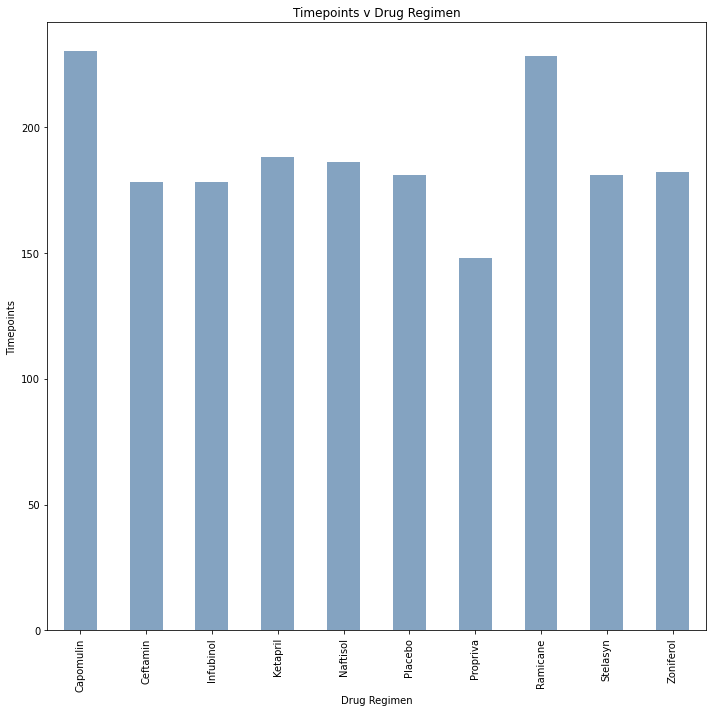

<AxesSubplot:title={'center':'Timepoints v Drug Regimen'}, xlabel='Drug Regimen', ylabel='Timepoints'>

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_bar = cleaned_data.groupby(["Drug Regimen"]).count()["Timepoint"] 
pandas_bar_plot = mice_bar.plot.bar(figsize=(10,10), color=(0.2, 0.4, 0.6, 0.6))
pandas_bar_plot 
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.title("Timepoints v Drug Regimen")
plt.tight_layout()
plt.show()
pandas_bar_plot

Text(0, 0.5, 'Timepoints')

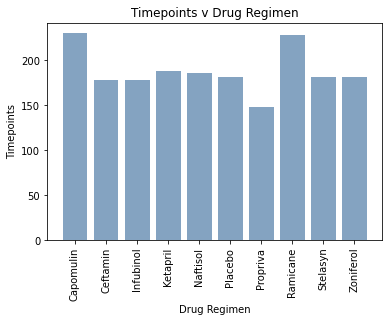

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

pyplot_bar_plot = drug_regimen_df.index.tolist()
#pyplot_bar_plot
pyplot_bar_plot_count = (cleaned_data.groupby(["Drug Regimen"])["Timepoint"].count()).tolist()
#pyplot_bar_plot_count

regimen_count = np.arange(len(mice_bar))
#regimen_count
plt.bar(regimen_count, pyplot_bar_plot_count, color=(0.2, 0.4, 0.6, 0.6), align='center')
ticks = [value for value in regimen_count]

plt.xticks(ticks, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.title("Timepoints v Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")

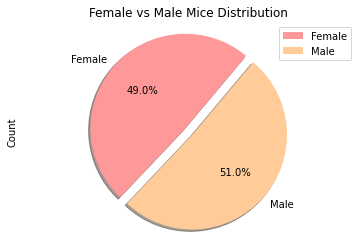

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_pie_df = cleaned_data.groupby(["Sex"]).count()
#mice_pie_df
mice_pie_df = mice_pie_df["Mouse ID"]
#mice_pie_df

colors = ['#ff9999','#ffcc99']
explode = (0.1, 0)

pie_plot_pandas = mice_pie_df.plot.pie(y='Mouse ID', colors = colors, 
                    startangle=50, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Female vs Male Mice Distribution')
plt.ylabel('Count')
plt.axis("equal")
plt.legend() 
plt.show()

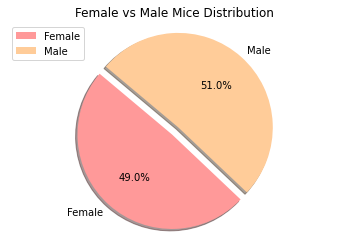

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#INCOMPLETE
pyplot_pie_chart_count = (cleaned_data.groupby(["Sex"])["Age_months"].count()).tolist()
#pyplot_pie_chart_count

gender = ["Female", "Male"]
colors = ['#ff9999','#ffcc99']
explode = (0.1,0)

plt.pie(pyplot_pie_chart_count, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('Female vs Male Mice Distribution')
plt.axis("equal")
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [126]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# # Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(cleaned_data.groupby('Mouse ID')['Timepoint'].max().sort_values(ascending = False)).reset_index()
#max_timepoint
max_timepoint = max_timepoint.rename(columns={'Timepoint': 'Max timepoint'})
#max_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_timepoint = pd.merge(cleaned_data, max_timepoint, on='Mouse ID')
merged_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [148]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol_data = []

for regimen in regimen_list:

    temp_df = merged_timepoint.loc[merged_timepoint["Drug Regimen"] == regimen]
    #print(temp_df)
    
    vol_df = temp_df.loc[temp_df["Timepoint"] == temp_df["Max timepoint"]]
    #print(vol_df)
    
    data = vol_df["Tumor Volume (mm3)"]
    tumor_vol_data.append(data)
    #print(tumor_vol_data)
    
    quartiles = data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"------------------------------------------------{regimen}")
    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range is: {iqr}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    outlier_df = (data.loc[(vol_df['Tumor Volume (mm3)'] >= upper_bound) |
                                (vol_df['Tumor Volume (mm3)'] <= lower_bound)])
    print(f"Number of outliers in this regimen: {outlier_df.count()}")
    

------------------------------------------------Capomulin
The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Number of outliers in this regimen: 0
------------------------------------------------Ramicane
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Number of outliers in this regimen: 0
------------------------------------------------Infubinol
The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Number of outliers in this regimen: 1
------------------------------------------------Ceftamin
The lower quartile 

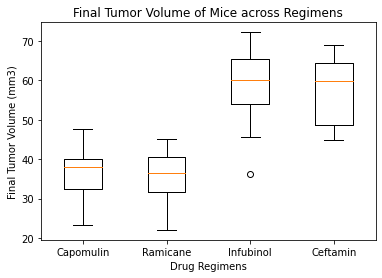

In [158]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Mice across Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimens')
ax1.boxplot(tumor_vol_data, labels=regimen_list)
plt.show()

## Line and Scatter Plots

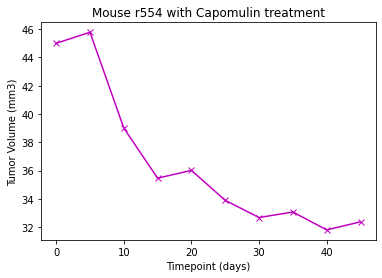

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

line_plot_df = cleaned_data.loc[cleaned_data["Mouse ID"] == "r554",:]
#line_plot_df.head()
line_plot_df = line_plot_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
line_plot_df = line_plot_df.reset_index(drop=True)
#line_plot_df
x_axis = line_plot_df["Timepoint"]
y_axis = line_plot_df["Tumor Volume (mm3)"]

plt.title('Mouse r554 with Capomulin treatment')
plt.plot(x_axis, y_axis, marker="x",color="m")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

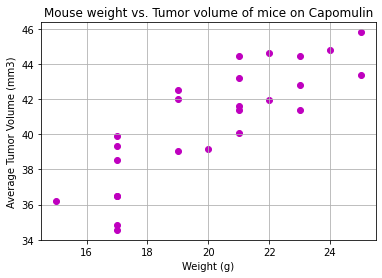

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_scatter = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]
#capomulin_scatter
capomulin_scatter = capomulin_scatter.reset_index(drop=True)
#capomulin_scatter
capomulin_scatter_df = capomulin_scatter.loc[:, ["Mouse ID", "Tumor Volume (mm3)","Weight (g)"]]
#capomulin_scatter_df
average_vol =capomulin_scatter_df.groupby(['Mouse ID']).mean()
#average_vol

plt.scatter(average_vol['Weight (g)'],average_vol['Tumor Volume (mm3)'], color="m")
plt.title('Mouse weight vs. Tumor volume of mice on Capomulin')
plt.grid()
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [87]:
# Calculate the correlation coefficient 
# for mouse weight and average tumor volume for the Capomulin regimen
average_df = pd.DataFrame(cleaned_data.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
#average_df
mouse_weight = average_df.iloc[:,1]
#mouse_weight
avg_tumor_vol = average_df.iloc[:,2]
#avg_tumor_vol
correlation = st.pearsonr(mouse_weight,avg_tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.66


y = 1.1x + 21.01
The r-squared is: 0.43502


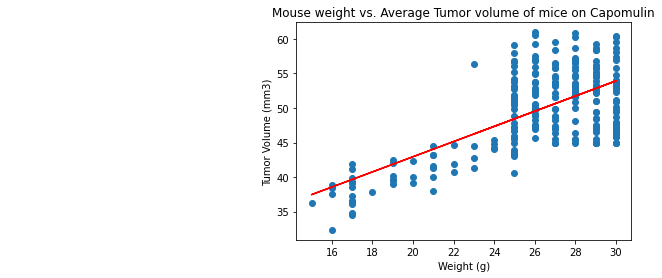

In [105]:
#INCOMPLETE
#linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = average_df['Weight (g)']
y_values = average_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50), color="red")
plt.title('Mouse weight vs. Average Tumor volume of mice on Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(line_eq)
print(f"The r-squared is: {round(rvalue**2,5)}")
plt.show()